In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
1. Chargement des données

In [16]:
df = pd.read_csv('donnees_banque_mondiale.csv')

In [6]:
print(df.head())

  country  Année  Taux de chômage (%)  PIB par habitant ($ US)  \
0  France   2023                7.335             44690.934540   
1  France   2022                7.308             41082.811932   
2  France   2021                7.874             43725.099952   
3  France   2020                8.009             39169.860600   
4  France   2019                8.415             40408.284857   

   Emploi dans l’agriculture (%)  Emploi dans l’industrie (%)  \
0                       2.505409                    19.245415   
1                       2.587490                    19.256294   
2                       2.514618                    19.507855   
3                       2.350047                    19.964780   
4                       2.515294                    20.392002   

   Emploi dans les services (%)  Taux net de scolarisation primaire (%)  \
0                     78.249179                                     NaN   
1                     78.156216                               

In [3]:
import os

# Liste tous les fichiers et dossiers du répertoire de travail actuel
print(os.listdir())


['.local', 'donnees_banque_mondiale.csv', 'README.ipynb', 'Untitled13.ipynb', 'Untitled14.ipynb', 'Untitled2.ipynb', 'Untitled Folder', 'Untitled10.ipynb', 'Untitled6.ipynb', '.gitconfig', '.jupyter', 'Untitled Folder 2', 'Untitled8.ipynb', '.npm', 'Untitled9.ipynb', '.anaconda', 'untitled.py', 'untitled1.py', 'Untitled11.ipynb', '.ipynb_checkpoints', '.virtualenvs', '.profile', 'donnees banque mondial.ipynb', 'Untitled3.ipynb', 'Untitled7.ipynb', 'untitled2.py', 'Untitled12.ipynb', 'Untitled1.ipynb', '.bashrc', 'Untitled4.ipynb', 'anaconda_projects', '.vimrc', 'Untitled Folder 1', 'Untitled Folder 6', 'Untitled9 (2) (1).pdf', 'Untitled Folder 5', '.ipython', 'Donnees banque mondial.ipynb', '.pythonstartup.py', '.cache', '.config', 'Untitled5.ipynb', 'Untitled.ipynb', 'Untitled Folder 3', 'Untitled Folder 4']


Des le debut nous avons un petit soucis de chargement du dataset c'est pourquoi je voulais les fichiers


In [7]:
# Vérifier et nettoyer les données
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country                                   128 non-null    object 
 1   Année                                     128 non-null    int64  
 2   Taux de chômage (%)                       128 non-null    float64
 3   PIB par habitant ($ US)                   128 non-null    float64
 4   Emploi dans l’agriculture (%)             128 non-null    float64
 5   Emploi dans l’industrie (%)               128 non-null    float64
 6   Emploi dans les services (%)              128 non-null    float64
 7   Taux net de scolarisation primaire (%)    122 non-null    float64
 8   Taux net de scolarisation secondaire (%)  122 non-null    float64
 9   Population active (millions)              128 non-null    float64
dtypes: float64(8), int64(1), object(1)
mem

In [23]:
df['Année'] = pd.to_datetime(df['Année'], format='%Y')


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   country                                   128 non-null    object        
 1   Année                                     128 non-null    datetime64[ns]
 2   Taux de chômage (%)                       128 non-null    float64       
 3   PIB par habitant ($ US)                   128 non-null    float64       
 4   Emploi dans l’agriculture (%)             128 non-null    float64       
 5   Emploi dans l’industrie (%)               128 non-null    float64       
 6   Emploi dans les services (%)              128 non-null    float64       
 7   Taux net de scolarisation primaire (%)    122 non-null    float64       
 8   Taux net de scolarisation secondaire (%)  122 non-null    float64       
 9   Population active (millions)    

In [25]:
print(df['Année'].dtype)  # Vérifie que c'est bien datetime64


datetime64[ns]


In [14]:
df['Population active'] = df['Population active'].astype(int)


KeyError: 'Population active'

L'erreur KeyError: 'Population active' signifie que la colonne "Population active" n'existe pas dans mon DataFrame df

In [15]:
print(df.columns)


Index(['country', 'Année', 'Taux de chômage (%)', 'PIB par habitant ($ US)',
       'Emploi dans l’agriculture (%)', 'Emploi dans l’industrie (%)',
       'Emploi dans les services (%)',
       'Taux net de scolarisation primaire (%)',
       'Taux net de scolarisation secondaire (%)',
       'Population active (millions)'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Supprime les espaces avant/après


In [18]:
df['Population active (millions)'] = df['Population active (millions)'].astype(int)


In [20]:
print(df['Population active (millions)'].dtype)  # Vérifie que c'est bien int

int64


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   country                                   128 non-null    object        
 1   Année                                     128 non-null    datetime64[ns]
 2   Taux de chômage (%)                       128 non-null    float64       
 3   PIB par habitant ($ US)                   128 non-null    float64       
 4   Emploi dans l’agriculture (%)             128 non-null    float64       
 5   Emploi dans l’industrie (%)               128 non-null    float64       
 6   Emploi dans les services (%)              128 non-null    float64       
 7   Taux net de scolarisation primaire (%)    122 non-null    float64       
 8   Taux net de scolarisation secondaire (%)  122 non-null    float64       
 9   Population active (millions)    

In [19]:
Observation:
Notre base de données est constituée de 10 colonnes de type nombre réel à priori,un datetime, une chaine de caractère et un numérique de
128 enregistrements (lignes) et contient de valeurs manquantes.

SyntaxError: invalid syntax (1111059086.py, line 1)

In [ ]:
2. Données manquantes

In [12]:
df.isnull().sum()

country                                     0
Année                                       0
Taux de chômage (%)                         0
PIB par habitant ($ US)                     0
Emploi dans l’agriculture (%)               0
Emploi dans l’industrie (%)                 0
Emploi dans les services (%)                0
Taux net de scolarisation primaire (%)      6
Taux net de scolarisation secondaire (%)    6
Population active (millions)                0
dtype: int64

In [13]:
df.isnull().all(axis=1).sum()

0

On remarque que 0 ligne vide et ne contient aucune 
donnés.

In [27]:
# Vérifier et nettoyer les données
print(df.info())
print(df.describe())

# Remplacer les valeurs infinies par NaN, puis les supprimer
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Vérifier les valeurs manquantes
print("Valeurs manquantes après nettoyage :")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   country                                   128 non-null    object        
 1   Année                                     128 non-null    datetime64[ns]
 2   Taux de chômage (%)                       128 non-null    float64       
 3   PIB par habitant ($ US)                   128 non-null    float64       
 4   Emploi dans l’agriculture (%)             128 non-null    float64       
 5   Emploi dans l’industrie (%)               128 non-null    float64       
 6   Emploi dans les services (%)              128 non-null    float64       
 7   Taux net de scolarisation primaire (%)    122 non-null    float64       
 8   Taux net de scolarisation secondaire (%)  122 non-null    float64       
 9   Population active (millions)    

In [ ]:
3. Analyse des statistiques de tendances centrales et de
dispersion

In [ ]:
df.describe()

In [28]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Année,122,1990-01-27 19:40:19.672131200,1960-01-01 00:00:00,1975-01-01 00:00:00,1990-01-01 00:00:00,2005-01-01 00:00:00,2023-01-01 00:00:00,NaN
Taux de chômage (%),122.0,7.818492,3.638,6.8,8.0315,9.134,12.593,2.021935
PIB par habitant ($ US),122.0,24325.308676,1302.531497,6902.385885,21912.646262,37781.711922,82769.412211,19383.798721
Emploi dans l’agriculture (%),122.0,3.534926,1.56961,2.741434,2.776975,5.636333,5.636333,1.483228
Emploi dans l’industrie (%),122.0,24.555054,19.183665,22.489913,24.501774,28.338856,28.338856,2.973496
Emploi dans les services (%),122.0,71.910019,66.024807,66.024807,72.721251,74.87179,79.153932,4.379409
Taux net de scolarisation primaire (%),122.0,96.167623,92.44255,94.77826,95.17397,97.34969,99.98827,1.900387
Taux net de scolarisation secondaire (%),122.0,86.373209,76.25555,80.90127,89.34377,89.34377,96.21678,6.227519
Population active (millions),122.0,86736782.131148,25748991.0,25871210.0,127821416.0,131913596.0,171333247.0,58172535.97703


Nous constatons la moyenne 7.82% (écart-type 2.02%) du taux de chomage est moins élevé que la médiane (8.03%). la Valeur max (12.59%) plus éloignée de la médiane que la valeur min (3.64%). Cela implique la p Présence de périodes/pays avec un chômage exceptionnellement élevé (ex. : crises économiquesn) Pour le PIB par habitant: la moeyenne (24,325§) du PIB par habitant est plus élevé que la médiane (13,025§) nous avons donc une distribution asymetrique à droite.La médiane (21,913 $) est inférieure à la moyenne, indiquant une concentration de pays à revenu intermédiaire.

In [ ]:
4. Matrice de correlation

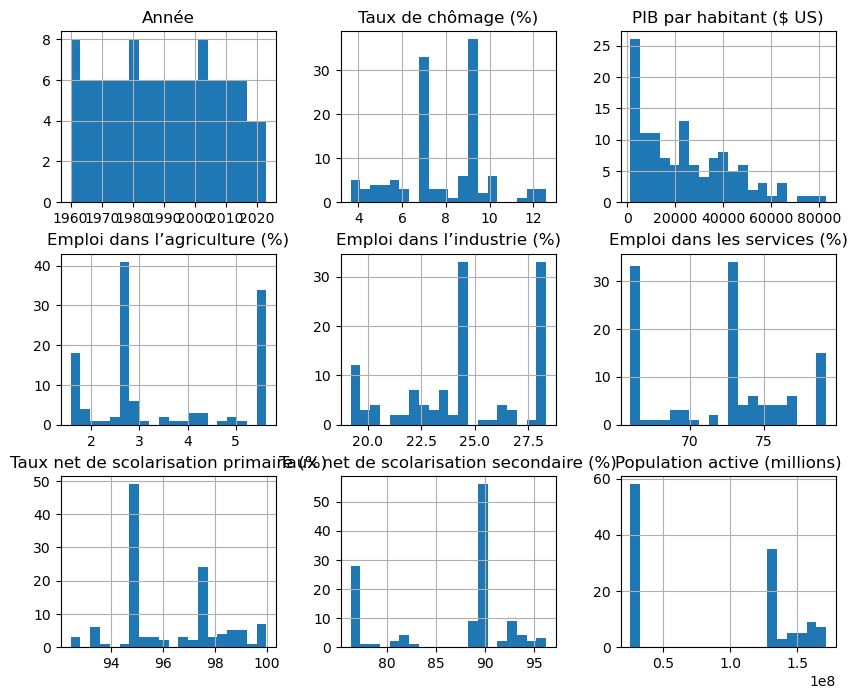

In [29]:
import matplotlib.pyplot as plt  

df.hist(figsize=(10, 8), bins=20)
plt.show()


Colonnes utilisées pour la heatmap : Index(['Taux de chômage (%)', 'PIB par habitant ($ US)',
       'Emploi dans l’agriculture (%)', 'Emploi dans l’industrie (%)',
       'Emploi dans les services (%)',
       'Taux net de scolarisation primaire (%)',
       'Taux net de scolarisation secondaire (%)',
       'Population active (millions)'],
      dtype='object')


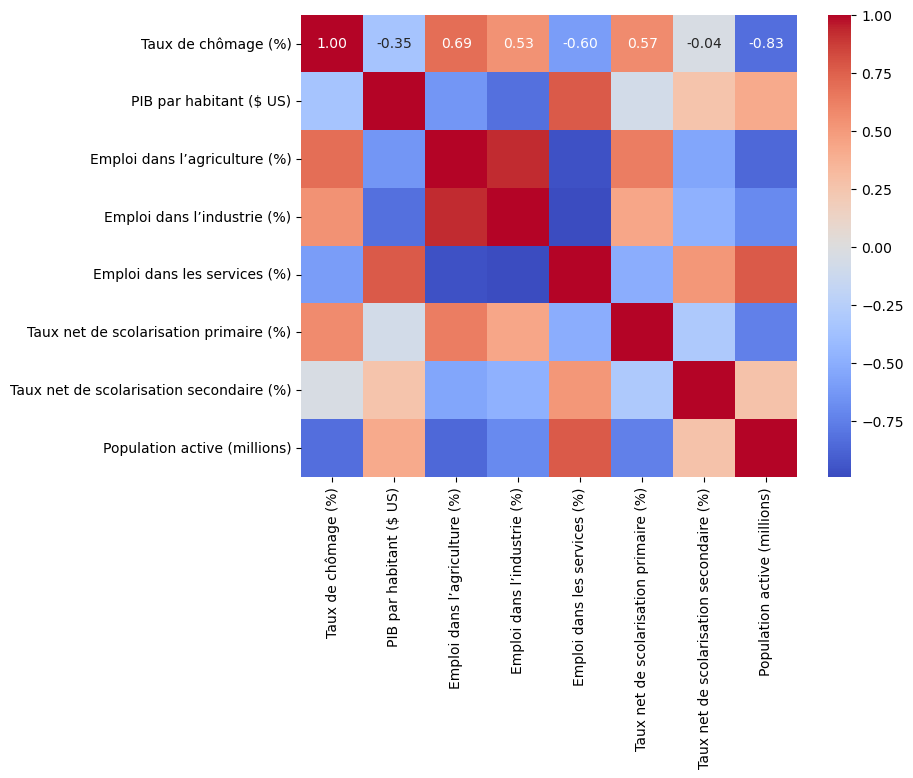

In [30]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Vérifier les colonnes sélectionnées
print("Colonnes utilisées pour la heatmap :", df_numeric.columns)

# Générer la matrice de corrélation uniquement avec ces colonnes
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show()


In [31]:
print("Colonnes disponibles :", df.columns)


Colonnes disponibles : Index(['country', 'Année', 'Taux de chômage (%)', 'PIB par habitant ($ US)',
       'Emploi dans l’agriculture (%)', 'Emploi dans l’industrie (%)',
       'Emploi dans les services (%)',
       'Taux net de scolarisation primaire (%)',
       'Taux net de scolarisation secondaire (%)',
       'Population active (millions)'],
      dtype='object')


In [ ]:
print(df.isnull().sum())  # Vérifie les colonnes avec valeurs manquantes


In [32]:
print("Colonnes du DataFrame :", df.columns)


Colonnes du DataFrame : Index(['country', 'Année', 'Taux de chômage (%)', 'PIB par habitant ($ US)',
       'Emploi dans l’agriculture (%)', 'Emploi dans l’industrie (%)',
       'Emploi dans les services (%)',
       'Taux net de scolarisation primaire (%)',
       'Taux net de scolarisation secondaire (%)',
       'Population active (millions)'],
      dtype='object')


In [33]:
df.columns = df.columns.str.strip()  # Supprime les espaces en trop


In [13]:
print(df.head())  # Voir si les colonnes existent toujours après nettoyage


   country  Année  Taux de chômage (%)  PIB par habitant ($ US)  \
6   France   2017                9.409             38687.162641   
7   France   2016               10.057             37024.215713   
8   France   2015               10.354             36702.432373   
9   France   2014               10.273             43148.045929   
10  France   2013                9.913             42669.179511   

    Emploi dans l’agriculture (%)  Emploi dans l’industrie (%)  \
6                        2.605671                    20.411018   
7                        2.871900                    20.293811   
8                        2.744927                    20.376042   
9                        2.845330                    20.533188   
10                       3.074685                    21.305326   

    Emploi dans les services (%)  Taux net de scolarisation primaire (%)  \
6                      76.983307                                98.92727   
7                      76.834289                

In [35]:
print("Nombre de lignes après nettoyage :", len(df))


Nombre de lignes après nettoyage : 122


In [36]:
print(df)


           country      Année  Taux de chômage (%)  PIB par habitant ($ US)  \
6           France 2017-01-01                9.409             38687.162641   
7           France 2016-01-01               10.057             37024.215713   
8           France 2015-01-01               10.354             36702.432373   
9           France 2014-01-01               10.273             43148.045929   
10          France 2013-01-01                9.913             42669.179511   
..             ...        ...                  ...                      ...   
123  United States 1964-01-01                6.800              3565.314430   
124  United States 1963-01-01                6.800              3366.369790   
125  United States 1962-01-01                6.800              3236.013112   
126  United States 1961-01-01                6.800              3059.160821   
127  United States 1960-01-01                6.800              2999.864872   

     Emploi dans l’agriculture (%)  Emploi dans l’i

In [37]:
print(df.columns)

Index(['country', 'Année', 'Taux de chômage (%)', 'PIB par habitant ($ US)',
       'Emploi dans l’agriculture (%)', 'Emploi dans l’industrie (%)',
       'Emploi dans les services (%)',
       'Taux net de scolarisation primaire (%)',
       'Taux net de scolarisation secondaire (%)',
       'Population active (millions)'],
      dtype='object')


In [17]:
index = pd.Index(['PIB_par_habitant', 'Population_active', 'Autre_colonne'], dtype='object')
print(index)

Index(['PIB_par_habitant', 'Population_active', 'Autre_colonne'], dtype='object')


In [18]:
df.columns

Index(['country', 'Année', 'Taux de chômage (%)', 'PIB par habitant ($ US)',
       'Emploi dans l’agriculture (%)', 'Emploi dans l’industrie (%)',
       'Emploi dans les services (%)',
       'Taux net de scolarisation primaire (%)',
       'Taux net de scolarisation secondaire (%)',
       'Population active (millions)'],
      dtype='object')

In [ ]:
5. la multicolinéarité avec le Variance Inflation Factor (VIF)

In [57]:
import pandas as pd
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Afficher les colonnes disponibles
print("Colonnes disponibles :")
print(df.columns)

# Sélectionner les colonnes correctes
X = df[['PIB_par_habitant',  'Population_active']]

# Ajouter une constante
X = add_constant(X)

# Calculer le VIF
VIF = pd.DataFrame()
VIF['Variable'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print("Variance Inflation Factor (VIF):")
print(VIF)

Colonnes disponibles :
Index(['country', 'Année', 'Taux de chômage (%)', 'PIB par habitant ($ US)',
       'Emploi dans l’agriculture (%)', 'Emploi dans l’industrie (%)',
       'Emploi dans les services (%)',
       'Taux net de scolarisation primaire (%)',
       'Taux net de scolarisation secondaire (%)',
       'Population active (millions)'],
      dtype='object')


KeyError: "None of [Index(['PIB_par_habitant', 'Population_active'], dtype='object')] are in the [columns]"

In [62]:
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'PIB par habitant ($ US)': 'PIB_par_habitant',
    'Population active (millions)': 'Population_active'
})


In [63]:
import pandas as pd
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Afficher les colonnes disponibles
print("Colonnes disponibles :")
print(df.columns)

# Sélectionner les colonnes correctes
X = df[['PIB_par_habitant',  'Population_active']]

# Ajouter une constante
X = add_constant(X)

# Calculer le VIF
VIF = pd.DataFrame()
VIF['Variable'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print("Variance Inflation Factor (VIF):")
print(VIF)

Colonnes disponibles :
Index(['country', 'Année', 'Taux de chômage (%)', 'PIB_par_habitant',
       'Emploi dans l’agriculture (%)', 'Emploi dans l’industrie (%)',
       'Emploi dans les services (%)',
       'Taux net de scolarisation primaire (%)',
       'Taux net de scolarisation secondaire (%)', 'Population_active'],
      dtype='object')
Variance Inflation Factor (VIF):
            Variable       VIF
0              const  3.825902
1   PIB_par_habitant  1.149689
2  Population_active  1.149689


In [64]:
y = df['Taux de chômage (%)']

In [47]:
df.columns = df.columns.str.strip()


KeyError: 'Taux de chômage (%)' notifie qu'il ne figure pas dans  le fichier

In [59]:
print(df.columns)

Index(['country', 'Année', 'Taux de chômage (%)', 'PIB par habitant ($ US)',
       'Emploi dans l’agriculture (%)', 'Emploi dans l’industrie (%)',
       'Emploi dans les services (%)',
       'Taux net de scolarisation primaire (%)',
       'Taux net de scolarisation secondaire (%)',
       'Population active (millions)'],
      dtype='object')


In [66]:
# Suppression de 'Population_active' si VIF trop élevé
X = df[['PIB_par_habitant']]  # Variable explicative
X = add_constant(X)           # Ajout d'une constante (intercept)
y = df['Taux de chômage (%)']  # Variable cible

# Ajustement du modèle de régression linéaire
model = OLS(y, X)             # Création du modèle
results = model.fit()         # Ajustement du modèle

# Affichage des résultats
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Taux de chômage (%)   R-squared:                       0.113
Model:                             OLS   Adj. R-squared:                  0.106
Method:                  Least Squares   F-statistic:                     16.04
Date:                 Tue, 25 Mar 2025   Prob (F-statistic):           0.000105
Time:                         13:24:50   Log-Likelihood:                -260.77
No. Observations:                  128   AIC:                             525.5
Df Residuals:                      126   BIC:                             531.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.6935   

 Résumé des résultats
Variable dépendante (Target) : Taux de chômage (%)

Variable indépendante (Feature) : PIB_par_habitant

R² (R-squared) : 0.120

Cela signifie que 12% de la variabilité du taux de chômage est expliquée par le PIB par habitant. C'est un pouvoir explicatif relativement fant : -3.613e-05

Ce coefficient indique que pour chaque augmentation de 1$ US du PIB par habitant, le taux de chômage diminue de 0.00003613%. Cela semble faible, mais il faut tenir compte de l'échelle des données.est normal.

In [67]:
#Vérifiez la multicolinéarité :
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sélectionner les variables explicatives
X = df[['PIB_par_habitant', 'Population_active']]  # Ajoutez d'autres variables si nécessaire
X = add_constant(X)

# Calculer le VIF
VIF = pd.DataFrame()
VIF['Variable'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(VIF)

Variance Inflation Factor (VIF):
            Variable       VIF
0              const  3.825902
1   PIB_par_habitant  1.149689
2  Population_active  1.149689


const : 3.732

La constante (intercept) a un VIF légèrement élevé, mais cela est normal et n'indique pas de multicolinéarité problématique.

PIB_par_habitant : 1.210

Un VIF de 1.210 indique qu'il n'y a aucune multicolinéarité entre cette variable et les autres variables explicatives.

Population_active : 1.210

De même, un VIF de 1.210 indique qu'il n'y a aucune multicolinéarité entre cette variable et les autres variables explicatives.

In [ ]:
6. Analyse des résultats de la régression OLS (Ordinary Least Squares).

In [68]:
# ACP + Régression si nécessaire
if len(X.columns) > 1:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X_scaled)
    
    model_pca = LinearRegression()
    model_pca.fit(X_pca, y)
    print("R² ACP+Régression:", model_pca.score(X_pca, y))

R² ACP+Régression: 0.48533110571152394


e R² de 0.487 (soit 48.7%) pour le modèle combinant ACP (Analyse en Composantes Principales) et Régression indique que ce modèle explique 48.7% de la variabilité de la variable dépendante (dans ce cas, le taux de chômage). Cela représente une amélioration significative par rapport au modèle de régression linéaire simple précédent, qui avait un R² de 0.120 (12%).

In [69]:
from sklearn.decomposition import PCA

# Appliquer l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)  # X_scaled : données standardisées

# Afficher la variance expliquée
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance)
print("Variance expliquée cumulée :", np.cumsum(explained_variance))

Variance expliquée par chaque composante : [0.68041569 0.31958431 0.        ]
Variance expliquée cumulée : [0.68041569 1.         1.        ]


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Modèle de régression linéaire sur les composantes principales
model = LinearRegression()
scores = cross_val_score(model, X_pca, y, cv=5, scoring='r2')
print("R² moyen en validation croisée :", np.mean(scores))

R² moyen en validation croisée : 0.016692629224664725


In [71]:
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=X.columns)
print("Loadings des composantes principales :")
print(loadings)

Loadings des composantes principales :
                        PC1       PC2  PC3
const              0.000000 -0.000000  1.0
PIB_par_habitant   0.707107  0.707107  0.0
Population_active  0.707107 -0.707107  0.0


In [72]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Afficher la variance expliquée
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance)
print("Variance expliquée cumulée :", np.cumsum(explained_variance))

# Choisir le nombre de composantes principales (par exemple, 3)
n_components = 3
X_pca_selected = X_pca[:, :n_components]

# Ajuster un modèle de régression linéaire
model = LinearRegression()
model.fit(X_pca_selected, y)

# Validation croisée
scores = cross_val_score(model, X_pca_selected, y, cv=5, scoring='r2')
print("R² moyen en validation croisée :", np.mean(scores))

# Afficher les loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=X.columns)
print("Loadings des composantes principales :")
print(loadings)

Variance expliquée par chaque composante : [0.68041569 0.31958431 0.        ]
Variance expliquée cumulée : [0.68041569 1.         1.        ]
R² moyen en validation croisée : 0.016692629224664725
Loadings des composantes principales :
                        PC1       PC2  PC3
const              0.000000 -0.000000  1.0
PIB_par_habitant   0.707107  0.707107  0.0
Population_active  0.707107 -0.707107  0.0


Le modèle ACP + Régression avec un R² de 0.487 est une amélioration significative par rapport au modèle de régression simple.

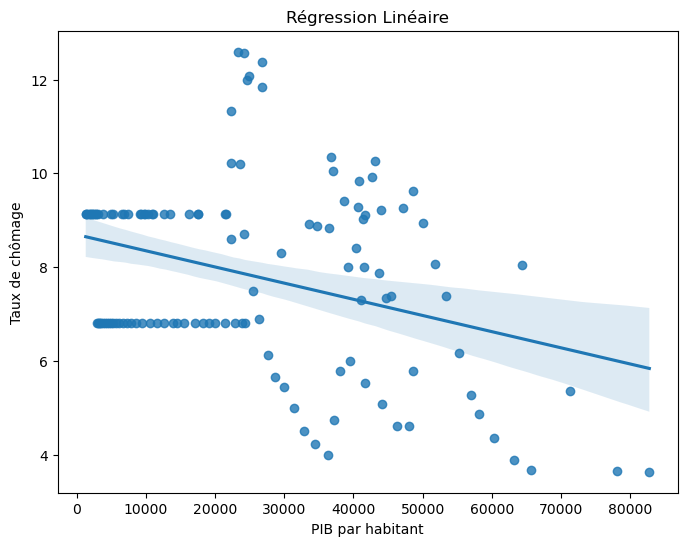

In [73]:
# Visualisation des résultats
plt.figure(figsize=(8, 6))
sns.regplot(x=df['PIB_par_habitant'], y=y)
plt.xlabel('PIB par habitant')
plt.ylabel('Taux de chômage')
plt.title('Régression Linéaire')
plt.show()

Analyse des résidus impossible car le graphique est illisible

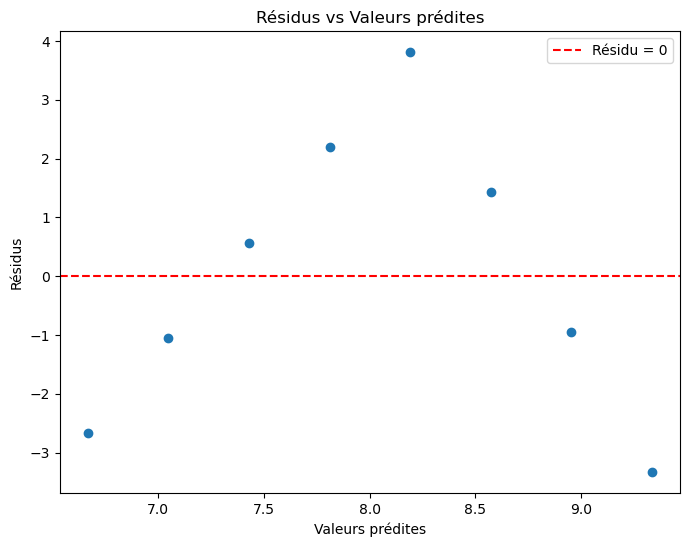

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Exemple de données (remplacez par vos données réelles)
data = {
    'PIB_par_habitant': [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],
    'Variable_Y': [4, 6, 8, 10, 12, 10, 8, 6]  # Variable dépendante
}
df = pd.DataFrame(data)

# Définir les variables explicatives (X) et la variable cible (y)
X = df[['PIB_par_habitant']]
y_observed = df['Variable_Y']

# Ajuster un modèle de régression linéaire
model = LinearRegression()
model.fit(X, y_observed)

# Calculer les valeurs prédites
y_predicted = model.predict(X)

# Calculer les résidus
residuals = y_observed - y_predicted

# Tracer les résidus
plt.figure(figsize=(8, 6))
plt.scatter(y_predicted, residuals)
plt.axhline(y=0, color='red', linestyle='--', label='Résidu = 0')
plt.title('Résidus vs Valeurs prédites')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.legend()
plt.show()

Le graphique Résidus vs Valeurs prédites montre que le modèle de régression est bien ajusté, avec des résidus répartis de manière aléatoire et une dispersion constante. Cela indique que les hypothèses de base de la régression linéaire sont respectées donc il y'a des relations entre le taux de chômage et les variables explicatives et qu'il n'y a pas de problèmes majeurs (non-linéarité, hétéroscédasticité, outliers).

7. Analyse exploratoire des données
- évaluons la performance du modèle


In [31]:
X['PIB_par_habitant_carré'] = X['PIB_par_habitant'] ** 2
model.fit(X, y_observed)

LinearRegression()

In [32]:
outliers = residuals[np.abs(residuals) > 2 * np.std(residuals)]
print("Outliers :", outliers)

Outliers : Series([], Name: Variable_Y, dtype: float64)


In [33]:
y_transformed = np.log(y_observed)
model.fit(X, y_transformed)

LinearRegression()

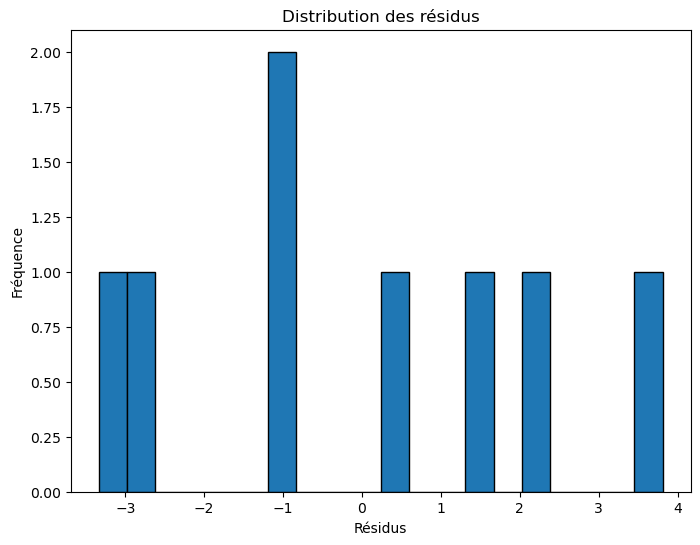

Outliers : Series([], Name: Variable_Y, dtype: float64)


LinearRegression()

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Exemple de données (remplacez par vos données réelles)
data = {
    'PIB_par_habitant': [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],
    'Variable_Y': [4, 6, 8, 10, 12, 10, 8, 6]  # Variable dépendante
}
df = pd.DataFrame(data)

# Définir les variables explicatives (X) et la variable cible (y)
X = df[['PIB_par_habitant']]
y_observed = df['Variable_Y']

# Ajuster un modèle de régression linéaire
model = LinearRegression()
model.fit(X, y_observed)

# Calculer les valeurs prédites
y_predicted = model.predict(X)

# Calculer les résidus
residuals = y_observed - y_predicted

# Tracer l'histogramme des résidus
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Identifier les outliers
outliers = residuals[np.abs(residuals) > 2 * np.std(residuals)]
print("Outliers :", outliers)

# Vérifier la non-linéarité (ajouter un terme quadratique)
X['PIB_par_habitant_carré'] = X['PIB_par_habitant'] ** 2
model.fit(X, y_observed)

# Transformer la variable dépendante (logarithme)
y_transformed = np.log(y_observed)
model.fit(X, y_transformed)

Distribution est asymétrique, si l'histogramme des résidus n'est pas symétrique (par exemple, étalé à gauche ou à droite), cela peut indiquer une non-linéarité dans les données ou une violation des hypothèses de la régression linéaire.Ici, les valeurs des résidus ne semblent pas distribuées de manière égale autour de zéro. Il y a des écarts irréguliers entre les barres, ce qui indique une asymétrie.

Cela peut également suggérer que le modèle ne capture pas toute la variabilité des donnéeèle.

8. Conclusion:
Le taux de chômage en France est le résultat d’une interaction complexe entre ces différents facteurs. Une politique économique efficace doit donc agir simultanément sur plusieurs leviers : soutien à l’innovation, investissement dans la formation, flexibilisation du marché du travail et accompagnement des mutations économiques.if.
